In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from src.sample_tiles import get_triplet_imgs, get_triplet_tiles
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append('../')

In [12]:
img_dir = '/storage/EuroSATallBands/AnnualCrop' # directory where images are saved
img_triplets = get_triplet_imgs(img_dir, ".tif", n_triplets=20)
print(img_triplets[:5,:])

[['AnnualCrop_2349.tif' 'AnnualCrop_1443.tif']
 ['AnnualCrop_2195.tif' 'AnnualCrop_2154.tif']
 ['AnnualCrop_752.tif' 'AnnualCrop_2528.tif']
 ['AnnualCrop_871.tif' 'AnnualCrop_1082.tif']
 ['AnnualCrop_2383.tif' 'AnnualCrop_1520.tif']]


In [13]:
tile_dir = 'data/annual_crops' # where you want to save your tiles
tiles = get_triplet_tiles(tile_dir,
                          img_dir, 
                          img_triplets, 
                          tile_size=50,
                          val_type='uint8',
                          bands_only=True,
                          save=True,
                          verbose=True)

Sampling image AnnualCrop_1082.tif
    Saving distant tile #3
    Distant tile center:(70, 54)
Sampling image AnnualCrop_1086.tif
    Saving distant tile #8
    Distant tile center:(79, 57)
Sampling image AnnualCrop_1170.tif
    Saving anchor and neighbor tile #13
    Anchor tile center:(76, 77)
    Neighbor tile center:(82, 63)
Sampling image AnnualCrop_1206.tif
    Saving anchor and neighbor tile #15
    Anchor tile center:(55, 57)
    Neighbor tile center:(49, 58)
Sampling image AnnualCrop_1377.tif
    Saving anchor and neighbor tile #16
    Anchor tile center:(88, 76)
    Neighbor tile center:(38, 83)
Sampling image AnnualCrop_1422.tif
    Saving distant tile #18
    Distant tile center:(46, 38)
Sampling image AnnualCrop_1443.tif
    Saving distant tile #0
    Distant tile center:(61, 73)
Sampling image AnnualCrop_1520.tif
    Saving distant tile #4
    Distant tile center:(66, 54)
Sampling image AnnualCrop_1598.tif
    Saving distant tile #10
    Distant tile center:(43, 45)
Sampl

/home/tymek/.conda/envs/tile2vec/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


    Saving anchor and neighbor tile #7
    Anchor tile center:(58, 84)
    Neighbor tile center:(71, 59)
Sampling image AnnualCrop_2154.tif
    Saving distant tile #1
    Distant tile center:(58, 75)
Sampling image AnnualCrop_2155.tif
    Saving distant tile #17
    Distant tile center:(76, 49)
Sampling image AnnualCrop_2195.tif
    Saving anchor and neighbor tile #1
    Anchor tile center:(70, 70)
    Neighbor tile center:(30, 36)
Sampling image AnnualCrop_2243.tif
    Saving distant tile #19
    Distant tile center:(88, 73)
Sampling image AnnualCrop_2273.tif
    Saving distant tile #6
    Distant tile center:(68, 39)
Sampling image AnnualCrop_2349.tif
    Saving anchor and neighbor tile #0
    Anchor tile center:(35, 47)
    Neighbor tile center:(42, 41)
Sampling image AnnualCrop_2377.tif
    Saving distant tile #7
    Distant tile center:(45, 84)
Sampling image AnnualCrop_2383.tif
    Saving anchor and neighbor tile #4
    Anchor tile center:(39, 67)
    Neighbor tile center:(31, 88

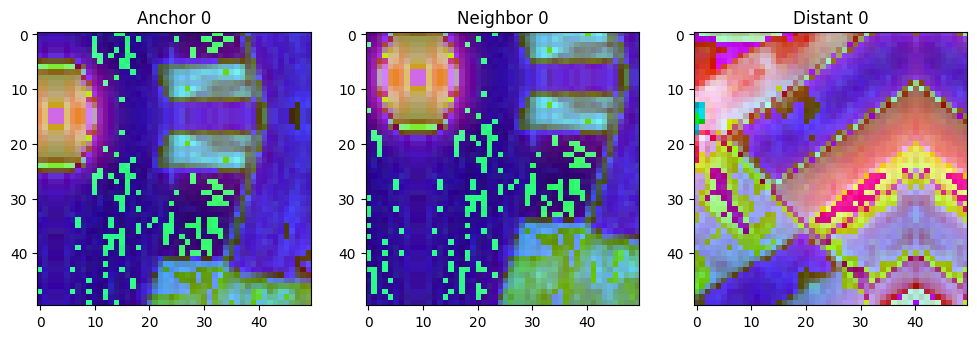

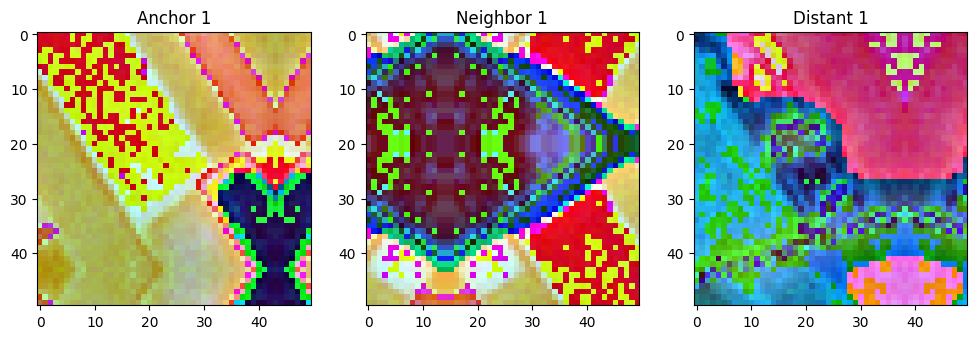

In [14]:
tile_dir = 'data/annual_crops/'
n_triplets = 2
plt.rcParams['figure.figsize'] = (12,4)
for i in range(n_triplets):
    tile = np.load(os.path.join(tile_dir, str(i)+'anchor.npy'))
    neighbor = np.load(os.path.join(tile_dir, str(i)+'neighbor.npy'))
    distant = np.load(os.path.join(tile_dir, str(i)+'distant.npy'))
    
    vmin = np.array([tile, neighbor, distant]).min()
    vmax = np.array([tile, neighbor, distant]).max()
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Anchor '+str(i))
    plt.subplot(1,3,2)
    plt.imshow(neighbor[:,:,[0,1,2]])
    plt.title('Neighbor '+str(i))
    plt.subplot(1,3,3)
    plt.imshow(distant[:,:,[0,1,2]])
    plt.title('Distant '+str(i))

above are multispectral images of the tiles, visibly those are in quite innatural colors

Let us properly explore the tif images, not using the provided code from the package

In [15]:
from osgeo import gdal


sample_filepath = '/storage/EuroSATallBands/AnnualCrop/AnnualCrop_2115.tif'

In [19]:
val_type = "float32"
obj = gdal.Open(sample_filepath)
if val_type == 'uint8':
    img = obj.ReadAsArray().astype(np.uint8)
elif val_type == 'float32':
    img = obj.ReadAsArray().astype(np.float32)
else:
    raise ValueError('Invalid val_type for image values. Try uint8 or float32.')
img = np.moveaxis(img, 0, -1)

wygląda na to że nasz img to jest 3 wymiarowa ndarray, który w 2 pierwszych wymiarach ma zapisane wymiary obrazka, ostatni niesie informacje o bandach

In [23]:
print("Image shape: ", img.shape)
print("Image type: ", type(img))

Image shape:  (64, 64, 13)
Image type:  <class 'numpy.ndarray'>


## Labels
there are additional csv files - train val and test, along with label_map.json.

In [29]:
import pandas as pd
df = pd.read_csv("/storage/EuroSATallBands/train.csv")
df.head()

,Filename,Label,ClassName
0,PermanentCrop/PermanentCrop_2401.tif,6,PermanentCrop
1,PermanentCrop/PermanentCrop_1006.tif,6,PermanentCrop
2,HerbaceousVegetation/HerbaceousVegetation_1025...,2,HerbaceousVegetation
3,SeaLake/SeaLake_1439.tif,9,SeaLake
4,River/River_1052.tif,8,River


In [30]:
df = pd.read_csv("/storage/EuroSATallBands/test.csv")
df.head()

,Filename,Label,ClassName
0,HerbaceousVegetation/HerbaceousVegetation_2000...,2,HerbaceousVegetation
1,HerbaceousVegetation/HerbaceousVegetation_514.tif,2,HerbaceousVegetation
2,Residential/Residential_597.tif,7,Residential
3,River/River_2122.tif,8,River
4,SeaLake/SeaLake_2747.tif,9,SeaLake


In [31]:
df = pd.read_csv("/storage/EuroSATallBands/test.csv")
df.head()

,Filename,Label,ClassName
0,HerbaceousVegetation/HerbaceousVegetation_2000...,2,HerbaceousVegetation
1,HerbaceousVegetation/HerbaceousVegetation_514.tif,2,HerbaceousVegetation
2,Residential/Residential_597.tif,7,Residential
3,River/River_2122.tif,8,River
4,SeaLake/SeaLake_2747.tif,9,SeaLake


well, it looks like the csv files simply contain information which image was in which class etc.

In [34]:
import json

with open("/storage/EuroSATallBands/label_map.json", "r") as file:
    label_map = json.load(file)

In [35]:
label_map

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [36]:
bands = img.shape[2]

Text(0.5, 1.0, 'different bands')

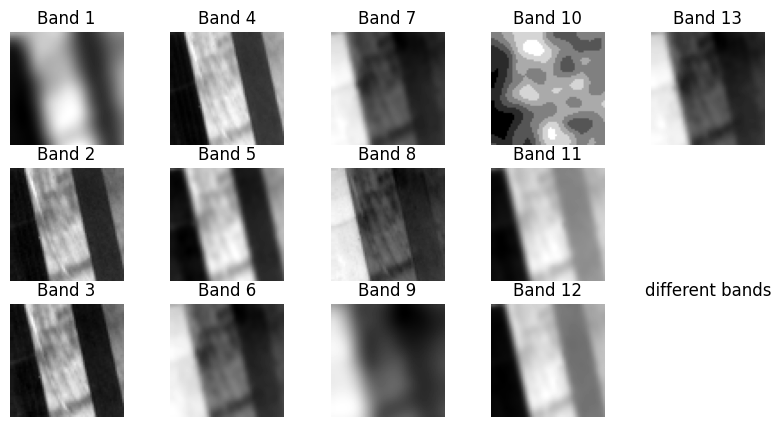

In [44]:
nrows = 3
fig, axs = plt.subplots(3, bands // nrows + 1, figsize=(10, 5))
if bands == 1:
    axs = [axs]
for i in range(bands):
    axs[i % 3, i // nrows].imshow(img[:,:, i], cmap='gray')  # You can change the cmap for different color maps
    axs[i % 3, i // nrows].set_title(f'Band {i+1}')

for i in range(nrows * (bands // nrows + 1)):
    axs[i % 3, i // nrows].axis('off')


plt.title("different bands")